## 과제4: 100개의 임의 점 좌표에 대해 5-최근접 이웃 구하기 및 시각화

### 목표 : 100개의 임의의 2차원 좌표에 대해 각 점의 5-최근접 이웃을 찾아 시각화하는 프로그램을 작성.
### 조건 :
- 거리: 유클리드 거리 제곱을 사용하여 각 점 간의 거리를 계산.
- 출력: 각 점에 대해 가장 가까운 5개의 이웃 좌표를 출력.
- 시각화: 각 좌표와 해당 좌표에 가까운 5개의 이웃을 스캐터 플롯으로 시각화. (점마다 이웃 관계를 선으로 연결하여 표시)


### 단계별 요구 사항
1. 난수 좌표 생성 :
 [0, 1) 범위에서 100개의 2차원 좌표를 생성.

In [1]:
import numpy as np

In [4]:
XY = np.random.rand(100, 2)
XY[:10]

array([[0.71887716, 0.36746129],
       [0.33549581, 0.88380851],
       [0.92358468, 0.27058107],
       [0.47761508, 0.43263731],
       [0.69550258, 0.64788009],
       [0.90357243, 0.5881777 ],
       [0.58516795, 0.54528203],
       [0.60489002, 0.04110382],
       [0.5048709 , 0.44203128],
       [0.12942582, 0.26201718]])

2. 거리 행렬 계산 :
각 점 간의 유클리드 거리 제곱을 계산하여 100x100 크기의 거리 행렬을 생성.

In [6]:
dist_sq = np.sum((XY[:, np.newaxis, :] - XY[np.newaxis, :, :]) ** 2, axis=2)
dist_sq[:5, :5]

array([[0.        , 0.41359571, 0.05129094, 0.0624553 , 0.07918108],
       [0.41359571, 0.        , 0.7218964 , 0.22375334, 0.18526709],
       [0.05129094, 0.7218964 , 0.        , 0.2251511 , 0.19437599],
       [0.0624553 , 0.22375334, 0.2251511 , 0.        , 0.09380442],
       [0.07918108, 0.18526709, 0.19437599, 0.09380442, 0.        ]])

3. 5-최근접 이웃 찾기 :
각 점에 대해 가장 가까운 5개의 점을 거리 순으로 정렬.
자기 자신을 제외하고 가장 가까운 5개의 이웃.

In [7]:
near_partition = np.argpartition(dist_sq, 6, axis=1)

4. 결과 출력 :
각 점에 대해 가장 가까운 5개의 이웃의 좌표와 거리 제곱을 출력.

In [8]:
for i in range(100):
  print('point', i, ': ', XY[i])
  print('nearest_5 points: ', XY[near_partition[i, 1:6]])
  print('distance_square: ', dist_sq[i, near_partition[i, 1:6]])


point 0 :  [0.71887716 0.36746129]
nearest_5 points:  [[0.7505155  0.42852302]
 [0.70654272 0.24737583]
 [0.63437584 0.459403  ]
 [0.786503   0.47639002]
 [0.79192788 0.47355365]]
distance_square:  [0.00472952 0.01457266 0.01559375 0.01643872 0.016592  ]
point 1 :  [0.33549581 0.88380851]
nearest_5 points:  [[0.2976859  0.86277279]
 [0.32610904 0.83502525]
 [0.37522013 0.85089999]
 [0.30150613 0.97155529]
 [0.43438542 0.85804913]]
distance_square:  [0.00187209 0.00246792 0.00266099 0.0088548  0.0104427 ]
point 2 :  [0.92358468 0.27058107]
nearest_5 points:  [[0.93444413 0.26260786]
 [0.94060102 0.33171773]
 [0.82868451 0.28658828]
 [0.86214131 0.35913747]
 [0.80740682 0.14263357]]
distance_square:  [0.0001815  0.00402725 0.00926227 0.01161752 0.02986786]
point 3 :  [0.47761508 0.43263731]
nearest_5 points:  [[0.5048709  0.44203128]
 [0.5478709  0.44923731]
 [0.52169599 0.35573681]
 [0.50762757 0.34611929]
 [0.55227028 0.36428627]]
distance_square:  [0.00083113 0.00521144 0.00785681 0.0

5. 시각화 :
matplotlib를 사용하여 각 점과 해당 점의 5-최근접 이웃을 플롯.
각 점은 scatter로 표시하고, 가까운 이웃과 연결하는 선을 추가하여 관계를 시각적으로 표현.

In [10]:
import matplotlib.pyplot as plt

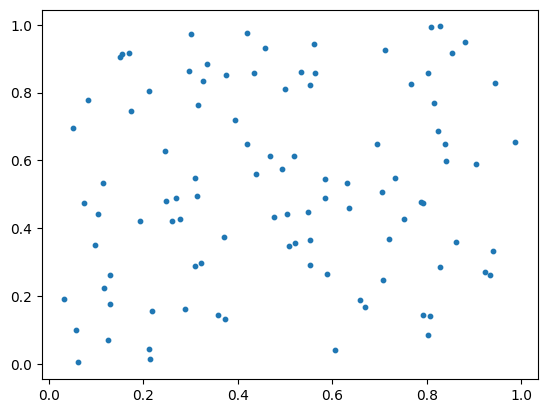

In [12]:
plt.scatter(XY[:, 0], XY[:, 1], s=10)

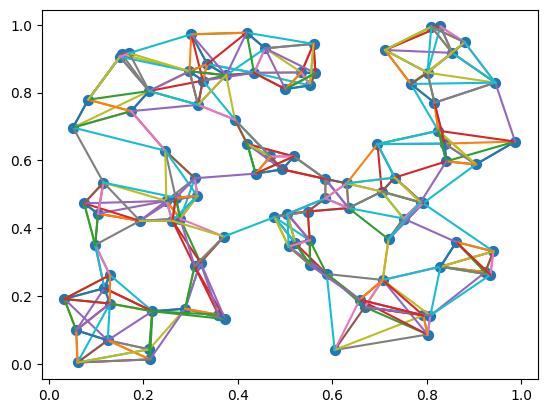

In [20]:
plt.scatter(XY[:, 0], XY[:, 1], s=50)
for i in range(100):
  for j in near_partition[i, 1:6]:
    plt.plot(*zip(XY[j], XY[i]))